# Depression Sentiment Prediction (Part-2)
## 5. Importing Libraries and Feature Extracted Data



In [2]:
import os
try:
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import roc_auc_score, confusion_matrix
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from nltk.tokenize import word_tokenize
    from wordcloud import WordCloud
except:
    os.system("pip install numpy pandas sklearn scipy xgboost nltk")

In [3]:
# Use the same encoding 'latin-1' as used in the previous notebook
data = pd.read_csv('feature_extracted.csv', encoding='latin-1')
data.head()

,target,text
0,1,upset cant updat facebook text might cri resul...
1,1,kenichan dive mani time ball manag save rest b...
2,1,whole bodi feel itchi like fire
3,1,nationwideclass behav mad cant see
4,1,kwesidei whole crew


In [4]:
#drop the NaN values.
data = data.dropna()

## 6. Splitting the Dataset
### We will split the data so that there is 98% (about *1,279,489* data points) in Training Set and remaning 2% (about *319,873* data points) in the Test Set.

In [5]:
text = data['text']
target = data['target']
trainX, testX, trainY, testY = train_test_split(text, target, test_size=0.02)

print("Training Data Size: {} and Testing Data Size: {}".format(trainX.shape[0], testX.shape[0]))

Training Data Size: 1567374 and Testing Data Size: 31988


## 7. Vectorizing data
### Machine Learning Models can't directly work on just text data (which is basically a collection of *strings*), so we have to find a way to convert this sequential data to normal numerical data that can be understood by these algorithms.
### One such widely used method is Tf-Idf Vectorizing. It's Basically replacing every word in the dataset with the number of times it appears in the Dataset. So that's just a word frequency counter and replacer.

In [6]:
# Initializing the Vectorizer
vectorizer = TfidfVectorizer()

In [7]:
# Vectorizing the Training Text data.
train_features = vectorizer.fit_transform(trainX)
# converting the training target values (trainY) into a numpy array
train_targets = np.array(trainY)

In [8]:

test_features = vectorizer.transform(testX)
test_targets = np.array(testY)

## 8. Training Machine Learning Models


### 8.1 Logistic Regression
##### ROC-AUC Score: 0.85

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Logistic Regression
lr_classifier = LogisticRegression(C=1.)
lr_classifier.fit(train_features, train_targets)

c:\Users\Lakshita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

ROC-AUC Value is: 0.8596478725934278


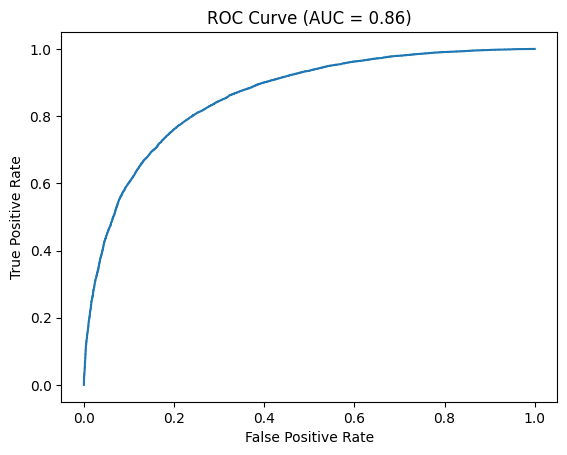


Total Size of Test Data: 31988
True Positives are: 12666
True Negatives are: 12293
False Positives are: 3186
False Negatives are: 3843


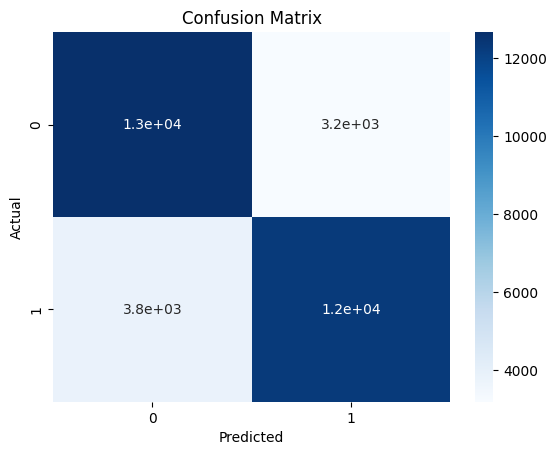

Accuracy: 0.780
Precision: 0.799
Recall: 0.767
F1 score: 0.783


In [10]:
# Test the Model on the Test Data
predictions = lr_classifier.predict_proba(test_features)

# get the ROC-AUC Score and Confusion Metrics
roc_auc_lr = roc_auc_score(test_targets, predictions[:,-1])
print("ROC-AUC Value is: {}".format(roc_auc_lr))

# Calculate FPR and TPR for different threshold values
fpr, tpr, thresholds = roc_curve(test_targets, predictions[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#confusion Matrix
confusion_lr = confusion_matrix(test_targets, np.round(predictions[:,-1]))

# Assign the True Positives (lr_tp), True Negatives (lr_tn), False Positives (lr_fp) and False Negatives (lr_fn)
lr_tp = confusion_lr[0][0]
lr_tn = confusion_lr[1][1]
lr_fp = confusion_lr[0][1]
lr_fn = confusion_lr[1][0]

print("\nTotal Size of Test Data: {}".format(testX.shape[0]))
print("True Positives are: {}\nTrue Negatives are: {}\nFalse Positives are: {}\nFalse Negatives are: {}".format(lr_tp, lr_tn, lr_fp, lr_fn))

sns.heatmap(confusion_lr, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Calculate accuracy, precision, recall, and F1 score from confusion matrix
lr_accuracy = (lr_tp + lr_tn) / (lr_tp + lr_tn + lr_fp + lr_fn)
lr_precision = lr_tp / (lr_tp + lr_fp)
lr_recall = lr_tp / (lr_tp + lr_fn)
lr_f1_score = 2 * (lr_precision * lr_recall) / (lr_precision + lr_recall)

# Print the Results
print("Accuracy: {:.3f}".format(lr_accuracy))
print("Precision: {:.3f}".format(lr_precision))
print("Recall: {:.3f}".format(lr_recall))
print("F1 score: {:.3f}".format(lr_f1_score))




### 8.2 Naive Bayes

##### ROC-AUC Score: 0.83

In [11]:
# Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(train_features, train_targets)

MultinomialNB()

ROC-AUC Value is: 0.8417176636115101


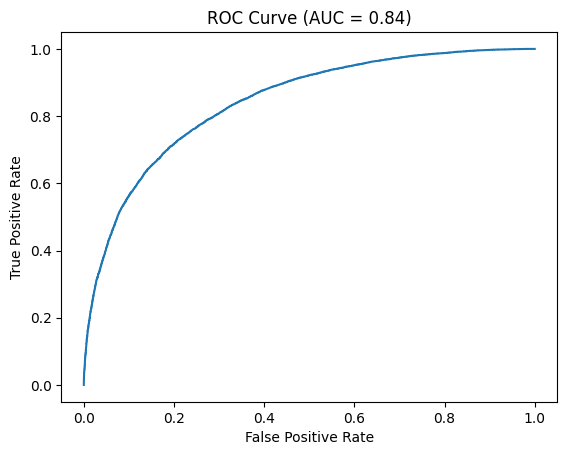


Total Size of Test Data: 31988
True Positives are: 11326
True Negatives are: 12848
False Positives are: 4526
False Negatives are: 3288


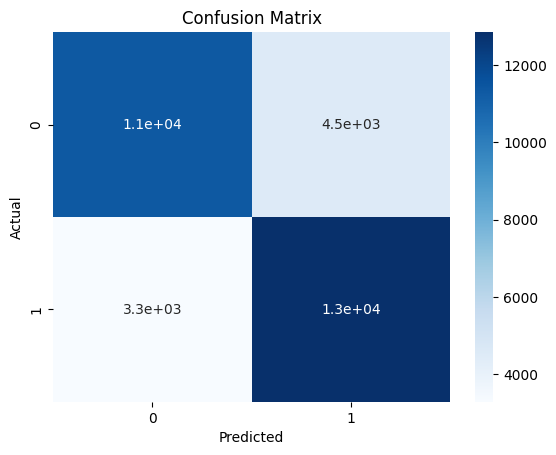

Accuracy: 0.756
Precision: 0.714
Recall: 0.775
F1 score: 0.744


In [12]:
# test the Naive Bayes Classifer on our Test Data
predictions = nb_classifier.predict_proba(test_features)

# ROC-AUC Score and Confusion Metrics
nb_roc_auc = roc_auc_score(test_targets, predictions[:,-1])
print("ROC-AUC Value is: {}".format(nb_roc_auc))

# Calculate FPR and TPR for different threshold values
fpr, tpr, thresholds = roc_curve(test_targets, predictions[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.title('ROC Curve (AUC = {:.2f})'.format(nb_roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#confusion Matrix
confusion_nb = confusion_matrix(test_targets, np.round(predictions[:,-1]))

# Assign the True Positives (nb_tp), True Negatives (nb_tn), False Positives (nb_fp) and False Negatives (nb_fn)
nb_tp = confusion_nb[0][0]
nb_tn = confusion_nb[1][1]
nb_fp = confusion_nb[0][1]
nb_fn = confusion_nb[1][0]

print("\nTotal Size of Test Data: {}".format(testX.shape[0]))
print("True Positives are: {}\nTrue Negatives are: {}\nFalse Positives are: {}\nFalse Negatives are: {}".format(nb_tp, nb_tn, nb_fp, nb_fn))

sns.heatmap(confusion_nb, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy, precision, recall, and F1 score from confusion matrix
nb_accuracy = (nb_tp + nb_tn) / (nb_tp + nb_tn + nb_fp + nb_fn)
nb_precision = nb_tp / (nb_tp + nb_fp)
nb_recall = nb_tp / (nb_tp + nb_fn)
nb_f1_score = 2 * (nb_precision * nb_recall) / (nb_precision + nb_recall)

# Print the Results
print("Accuracy: {:.3f}".format(nb_accuracy))
print("Precision: {:.3f}".format(nb_precision))
print("Recall: {:.3f}".format(nb_recall))
print("F1 score: {:.3f}".format(nb_f1_score))



### 8.3 Random Forest Classifier

#### ROC-AUC Score: 0.80

In [1]:
# random forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(train_features, train_targets)

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
# random forest Classifer on Test Data
predictions = rf_classifier.predict_proba(test_features)

# ROC-AUC Score and Confusion Metrics
rf_roc_auc = roc_auc_score(test_targets, predictions[:,-1])
print("ROC-AUC Value is: {}".format(rf_roc_auc))

# Calculate FPR and TPR for different threshold values
fpr, tpr, thresholds = roc_curve(test_targets, predictions[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.title('ROC Curve (AUC = {:.2f})'.format(rf_roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#confusion Matrix
confusion_rf = confusion_matrix(test_targets, np.round(predictions[:,-1]))

# Assign the True Positives (rf_tp), True Negatives (rf_tn), False Positives (rf_fp) and False Negatives (rf_fn)
rf_tp = confusion_rf[0][0]
rf_tn = confusion_rf[1][1]
rf_fp = confusion_rf[0][1]
rf_fn = confusion_rf[1][0]

print("\nTotal Size of Test Data: {}".format(testX.shape[0]))
print("True Positives are: {}\nTrue Negatives are: {}\nFalse Positives are: {}\nFalse Negatives are: {}".format(rf_tp, rf_tn, rf_fp, rf_fn))

sns.heatmap(confusion_rf, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy, precision, recall, and F1 score from confusion matrix
rf_accuracy = (rf_tp + rf_tn) / (rf_tp + rf_tn + rf_fp + rf_fn)
rf_precision = rf_tp / (rf_tp + rf_fp)
rf_recall = rf_tp / (rf_tp + rf_fn)
rf_f1_score = 2 * (rf_precision * rf_recall) / (rf_precision + rf_recall)

# Print the Results
print("Accuracy: {:.3f}".format(rf_accuracy))
print("Precision: {:.3f}".format(rf_precision))
print("Recall: {:.3f}".format(rf_recall))
print("F1 score: {:.3f}".format(rf_f1_score))


### 8.4 Decision Tree Classifier

#### ROC-AUC Score: 0.70

In [26]:
# Decision Tree Classifier on the data
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(train_features, train_targets)

In [ ]:
# Decision Tree Classifer on our Test Data
predictions = dt_classifier.predict_proba(test_features)

# ROC-AUC Score 
roc_auc_dt = roc_auc_score(test_targets, predictions[:,-1])
print("ROC-AUC Value is: {}".format(roc_auc_dt))

# Calculate FPR and TPR for different threshold values
fpr, tpr, thresholds = roc_curve(test_targets, predictions[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#confusion matrix
confusion_dt = confusion_matrix(test_targets, np.round(predictions[:,-1]))

sns.heatmap(confusion_dt, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

dt_tp = confusion_dt[0][0]
dt_tn = confusion_dt[1][1]
dt_fp = confusion_dt[0][1]
dt_fn = confusion_dt[1][0]

print("\nTotal Size of Test Data: {}".format(testX.shape[0]))
print("True Positives are: {}\nTrue Negatives are: {}\nFalse Positives are: {}\nFalse Negatives are: {}".format(dt_tp, dt_tn, dt_fp, dt_fn))

# Calculate accuracy, precision, recall, and F1 score from confusion matrix
accuracy = (dt_tp + dt_tn) / (dt_tp + dt_tn + dt_fp + dt_fn)
precision = dt_tp / (dt_tp + dt_fp)
recall = dt_tp / (dt_tp + dt_fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the Results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1_score))



ROC-AUC Value is: 0.7042962306550173

Total Size of Test Data: 31988
True Positives are: 11135
True Negatives are: 11396
False Positives are: 4872
False Negatives are: 4585


### 8.5 K-Nearest Neighbors Classifier

#### ROC-AUC Score: 0.72

In [13]:
# KNN Classifier on our data
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(train_features, train_targets)

KNeighborsClassifier()

ROC-AUC Value is: 0.7406644596503777


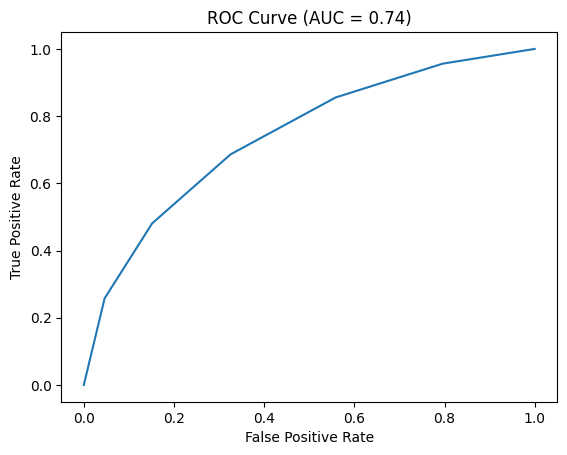


Total Size of Test Data: 31988
True Positives are: 10689
True Negatives are: 11076
False Positives are: 5163
False Negatives are: 5060


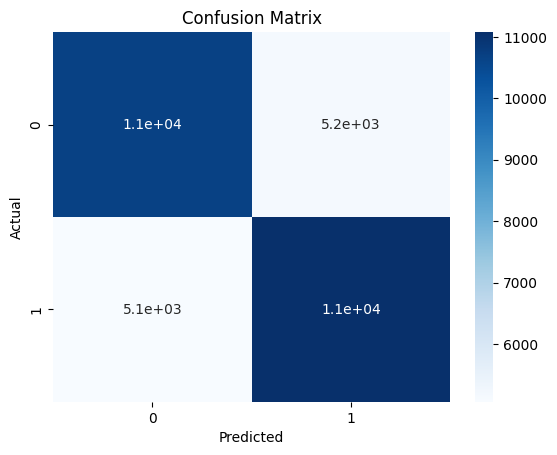

Accuracy: 0.680
Precision: 0.674
Recall: 0.679
F1 score: 0.676


In [14]:
# KNN Classifer on our Test Data
predictions = knn_classifier.predict_proba(test_features)

# ROC-AUC Score
knn_roc_auc = roc_auc_score(test_targets, predictions[:,-1])
print("ROC-AUC Value is: {}".format(knn_roc_auc))

# Calculate FPR and TPR for different threshold values
fpr, tpr, thresholds = roc_curve(test_targets, predictions[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.title('ROC Curve (AUC = {:.2f})'.format(knn_roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#confusion Matrix
confusion_knn = confusion_matrix(test_targets, np.round(predictions[:,-1]))

# Assign the True Positives (knn_tp), True Negatives (knn_tn), False Positives (knn_fp) and False Negatives (knn_fn)
knn_tp = confusion_knn[0][0]
knn_tn = confusion_knn[1][1]
knn_fp = confusion_knn[0][1]
knn_fn = confusion_knn[1][0]

print("\nTotal Size of Test Data: {}".format(testX.shape[0]))
print("True Positives are: {}\nTrue Negatives are: {}\nFalse Positives are: {}\nFalse Negatives are: {}".format(knn_tp, knn_tn, knn_fp, knn_fn))

sns.heatmap(confusion_knn, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy, precision, recall, and F1 score from confusion matrix
knn_accuracy = (knn_tp + knn_tn) / (knn_tp + knn_tn + knn_fp + knn_fn)
knn_precision = knn_tp / (knn_tp + knn_fp)
knn_recall = knn_tp / (knn_tp + knn_fn)
knn_f1_score = 2 * (knn_precision * knn_recall) / (knn_precision + knn_recall)

# Print the Results
print("Accuracy: {:.3f}".format(knn_accuracy))
print("Precision: {:.3f}".format(knn_precision))
print("Recall: {:.3f}".format(knn_recall))
print("F1 score: {:.3f}".format(knn_f1_score))



### 8.6 XGBOOST Classifier
#### ROC-AUC Score: 0.76

In [15]:
# XGBoost Classifier
xg_classifier = XGBClassifier()
xg_classifier.fit(train_features, train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

ROC-AUC Value is: 0.818551950344229


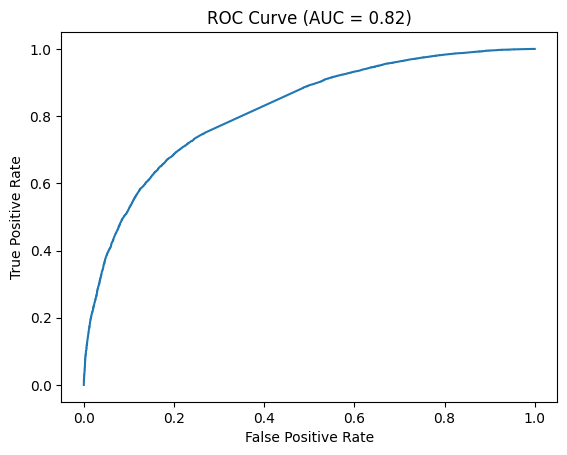


Total Size of Test Data: 31988
True Positives are: 13042
True Negatives are: 10643
False Positives are: 2810
False Negatives are: 5493


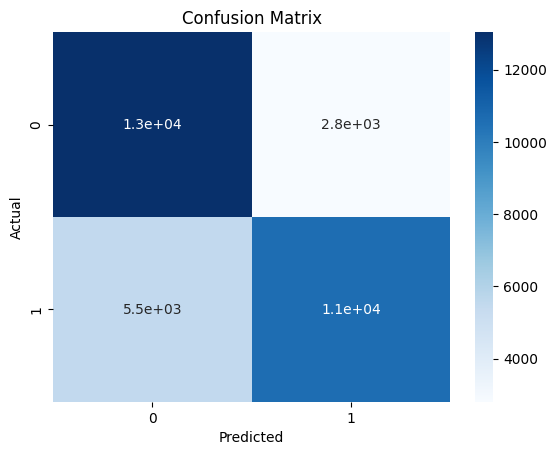

Accuracy: 0.740
Precision: 0.823
Recall: 0.704
F1 score: 0.759


In [16]:
# XGBoost Classifer on our Test Data
predictions = xg_classifier.predict_proba(test_features)

# ROC-AUC Score
xg_roc_auc = roc_auc_score(test_targets, predictions[:,-1])
print("ROC-AUC Value is: {}".format(xg_roc_auc))

# Calculate FPR and TPR for different threshold values
fpr, tpr, thresholds = roc_curve(test_targets, predictions[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.title('ROC Curve (AUC = {:.2f})'.format(xg_roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#confusion Matrix
confusion_xg = confusion_matrix(test_targets, np.round(predictions[:,-1]))

# Assign the True Positives (xg_tp), True Negatives (xg_tn), False Positives (xg_fp) and False Negatives (xg_fn)
xg_tp = confusion_xg[0][0]
xg_tn = confusion_xg[1][1]
xg_fp = confusion_xg[0][1]
xg_fn = confusion_xg[1][0]

print("\nTotal Size of Test Data: {}".format(testX.shape[0]))
print("True Positives are: {}\nTrue Negatives are: {}\nFalse Positives are: {}\nFalse Negatives are: {}".format(xg_tp, xg_tn, xg_fp, xg_fn))

sns.heatmap(confusion_xg, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate accuracy, precision, recall, and F1 score from confusion matrix
xg_accuracy = (xg_tp + xg_tn) / (xg_tp + xg_tn + xg_fp + xg_fn)
xg_precision = xg_tp / (xg_tp + xg_fp)
xg_recall = xg_tp / (xg_tp + xg_fn)
xg_f1_score = 2 * (xg_precision * xg_recall) / (xg_precision + xg_recall)

# Print the Results
print("Accuracy: {:.3f}".format(xg_accuracy))
print("Precision: {:.3f}".format(xg_precision))
print("Recall: {:.3f}".format(xg_recall))
print("F1 score: {:.3f}".format(xg_f1_score))



## 9. Optimal Hyperparamter Search using GridSearchCV
#### 1. Logistic Regression
#### 2. Naive Bayes
#### 3. XGBoost Classifier

### 9.1 Logistic Regression Hyperparamter Search


In [17]:
# define the parameter to do search on
parameters_lr = {'C':[1,10]}

# fit  GCV model to the data
gcv_lr = GridSearchCV(lr_classifier, parameters_lr, cv=5)
gcv_lr.fit(train_features, train_targets)

c:\Users\Lakshita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Lakshita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

GridSearchCV(cv=5, estimator=LogisticRegression(), param_grid={'C': [1, 10]})

In [18]:

print("Best Score found is: {}".format(gcv_lr.best_score_))

#recalculate and see if their is any change in our ROC-AUC Score
probs = gcv_lr.predict_proba(test_features)
roc_auc_gcv_lr = roc_auc_score(test_targets, probs[:,-1])
print("New ROC-AUC Score is found to be: {}".format(roc_auc_gcv_lr))

Best Score found is: 0.7814420810123386
New ROC-AUC Score is found to be: 0.8596478725934278


### 9.2 Naive Bayes Hyperparameter Search


In [19]:
# define parameters (Only, alpha)
parameters_nb = {  
    'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
}

gcv_nb = GridSearchCV(nb_classifier, parameters_nb)
gcv_nb.fit(train_features, train_targets)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)})

In [20]:

print("Best Score found is: {}".format(gcv_nb.best_score_))

# recalculate and see if their is any change in our ROC-AUC Score
probs = gcv_nb.predict_proba(test_features)
roc_auc_gcv_nb = roc_auc_score(test_targets, probs[:,-1])
print("New ROC-AUC Score is found to be: {}".format(roc_auc_gcv_nb))

Best Score found is: 0.7584762797716733
New ROC-AUC Score is found to be: 0.8417176636115101


### 9.3 XGBoost Classifier Hyperparameter Search


In [21]:
parameters_xgb = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10]}
gcv_xgb = GridSearchCV(xg_classifier, parameters_xgb)
gcv_xgb.fit(train_features, train_targets)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [22]:

print("Best Score found is: {}".format(gcv_xgb.best_score_))

# recalculate and see if their is any change in our ROC-AUC Score
probs = gcv_xgb.predict_proba(test_features)
roc_auc_gcv_xgb = roc_auc_score(test_targets, probs[:,-1])
print("New ROC-AUC Score is found to be: {}".format(roc_auc_gcv_xgb))

Best Score found is: 0.7461480165479154
New ROC-AUC Score is found to be: 0.8185889047937347


# Testing on real world Sentences


In [23]:
def process_text(text):
    
    import re
    
    # Convert text to lower and remove all special characters from it using regex
    text = text.lower()
    text = re.sub(r'[^(a-zA-Z)\s]','', text)
    
    # Tokenize the words using the word_tokenize() from nltk lib
    words = word_tokenize(text)
    
    # Only take the words whose length is greater than 2
    words = [w for w in words if len(w) > 2]
    
    # Get the stopwords for english language
    sw = stopwords.words('english')
    
    # Get only those words which are not in stopwords (those which are not stopwords)
    words = [word for word in words if word not in sw]
    
    # Get the PorterStemmer algorithm module
    stemmer = PorterStemmer()
    
    # Take the words with commoner morphological and inflexional endings from words removed
    words = [stemmer.stem(word) for word in words]
    
    # Till this point, we have a list of strings (words), we want them to be converted to a string of text
    final_str = ""
    for w in words:
        final_str += w
        final_str += " "
    
    # Return the final string
    return final_str

### Positive Sentence

In [24]:
# Make a sentence and process it
positive_sentence = "Having a really good time here!"
pos_sent = process_text(positive_sentence)

# Transform the sentence using TfIdf Vectorizer
vect_pos = vectorizer.transform(np.array([pos_sent]))

# Predict the Probabilities of the Sentence being Positive and Negative
pred_pos = lr_classifier.predict_proba(vect_pos)

# The First value in the prediction array is the %-chances of the text being positive and the second value is it
# being negative
isDepressed = pred_pos[0][0] < 0.3
print("Chances of Text Being Positive: {} %".format(pred_pos[0][0]*100))
print("Is the Person Depressed? {}".format(isDepressed))

Chances of Text Being Positive: 85.20768077661127 %
Is the Person Depressed? False


### Depressive Sentence

In [25]:
# Make a sentence and process it
negative_sentence = "Really sad that he left us and is never coming back. feel like crying"
neg_sent = process_text(negative_sentence)

# Transform the sentence using TfIdf Vectorizer
vect_neg = vectorizer.transform(np.array([neg_sent]))

# Predict the Probabilities of the Sentence being Positive and Negative
pred_neg = lr_classifier.predict_proba(vect_neg)

# The First value in the prediction array is the %-chances of the text being positive and the second value is it
# being negative
isDepressed = pred_neg[0][0] < 0.3
print("Chances of Text Being Positive: {} %".format(pred_neg[0][0]*100))
print("Is the Person Depressed? {}".format(isDepressed))

Chances of Text Being Positive: 0.006878065944759815 %
Is the Person Depressed? True
